# <font color="darkblue"> Prática 01: Classificação Linear - Regressão Logística </font>

**Objetivos:**


*   Implementar o modelo linear de *Regressão Logística*
*   Comparar seu resultado de classificiação linear com o LRClassifier

**Requisitos de execução:**


*   Upload dos arquivos *random_input.py*, *linearregression.py* e *lrclassifier.py*

**Atividade 1:**

1. Gere $N=100$ pontos aleatórios com rótulos de classificação utilizando a classe RandomInput da Aula 14;

    

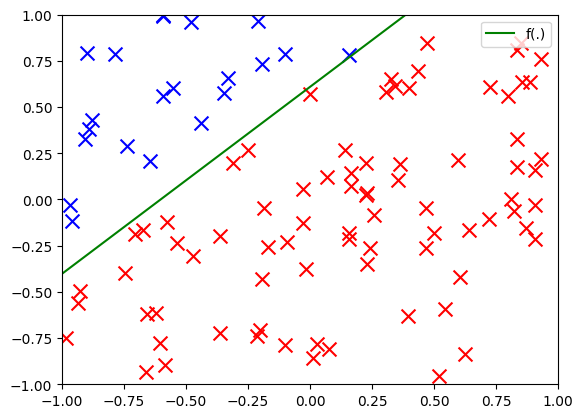

In [37]:
from random_input import RandomInput, draw
    
N = 100
rIN = RandomInput()
_X, _y = rIN.get_linear_input(N)
    
draw(_X, _y, rIN)

**Atividade 2:**

Implemente a *Regressão Logística* com o algoritmo *Gradiente Descendente*:

1. $w(0)=0$; $\eta = 0.1$;
2. **Para** $t=0,1,2..,tmax$ **faça**
3. $\quad\quad g_t=-\frac{1}{N}\sum_{n=1}^{N}\frac{y_nx_n}{1+e^{y_nw^T(t)x_n}}$;
4. $\quad\quad$ **Se** $(\lVert g_t \rVert < \epsilon)$ : **break**;
5. $\quad\quad w(t+1) = w(t) - \eta g_t$;
6. Retorne $w$


In [38]:
import numpy as np
from numpy import linalg as LA
import random
from random import sample 


class LogisticRegression_:
    def __init__(self, eta=0.1, tmax=1000, bs=1000000):
      self.eta = eta
      self.tmax = tmax
      self.batch_size = bs

    # Infere o vetor w da funçao hipotese
    #Executa a minimizao do erro de entropia cruzada pelo algoritmo gradiente de descida
    def fit(self, _X, _y):
        X = np.array(_X)
        y = np.array(_y)

        N = X.shape[0]
        d = X.shape[1]
        
        self.w = np.zeros(d)

        for t in range(self.tmax):
            somatorio = np.zeros(d)

            if self.batch_size < N:
                idx = np.random.choice(len(X), size=self.batch_size, replace=False)
                Xb = X[idx]
                yb = y[idx]
            else:
                Xb = X
                yb = y
            
            for i in range(Xb.shape[0]):
                exponencial = np.exp(yb[i]*(self.w @ Xb[i]))
                somatorio += (yb[i]*Xb[i]) / (1 + exponencial)
            
            gradiente = -(1/Xb.shape[0]) * somatorio

            if np.linalg.norm(gradiente) < 0.00000000000001 :
                break

            self.w = self.w - (self.eta * gradiente)
        
    #funcao hipotese inferida pela regressa logistica  
    def predict_prob(self, X):
        probabilidades = []

        for x in X:
            z = x @ self.w
            probabilidades.append(1 / (1 + np.exp(-z)))
            
        return np.array(probabilidades)

    #Predicao por classificação linear
    def predict(self, X):
        prob = self.predict_prob(X)
        
        classificacoes = np.empty(len(prob), dtype=int)

        for i in range(len(prob)):
            if prob[i] >= 0.5:
                classificacoes[i] = 1
            else:
                classificacoes[i] = -1
        
        return classificacoes

    def getW(self):
        return self.w

    def getRegressionY(self, regressionX, shift=0):
        return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]

**Atividade 3:** 

1. Utilize o algoritmo de *Regressão Logística* para computar a função hipótese $g(x)=\theta(w^Tx)$ inferida sobre os pontos aleatórios gerados;
2. Plote, em um gráfico de dispersão, a probabilidade inferida pelo algoritmo em cada ponto;
3. Utilize a *Regressão Logística* como classificador linear e plote os pontos classificados com bolinha azul(1) e vermelha(0);
4. Compute o erro dentro da amostra gerado pela classificação linear do algoritmo de *Regressão Logistica*.


[3.59900287e-02 9.54559194e-01 4.10539389e-02 6.35622020e-02
 7.23104145e-01 3.24975936e-02 2.05777417e-01 1.73990052e-01
 1.18693338e-03 5.04427641e-02 1.36092570e-03 2.68585552e-03
 9.57483295e-01 5.22796613e-03 4.24567631e-03 6.22520256e-03
 3.28694239e-02 3.88284578e-03 7.87175260e-02 4.70159353e-02
 3.59654987e-03 3.72375012e-01 2.98650152e-01 3.39256706e-02
 1.03550561e-01 8.14924573e-02 9.58384499e-01 2.21424798e-02
 6.81833127e-01 3.65698172e-02 4.72568832e-02 8.21704021e-01
 6.36394295e-03 8.75074824e-03 2.26325381e-01 1.94146175e-03
 2.84014840e-02 1.65530815e-01 1.84308057e-02 1.44066285e-01
 4.30573747e-01 3.00463071e-02 2.56603843e-01 6.69755272e-01
 3.92622158e-02 1.28916195e-02 9.68952181e-01 8.70093356e-01
 2.11705264e-02 1.85339565e-02 1.06598849e-01 2.71778969e-03
 7.43203360e-03 1.72438435e-02 3.08512816e-01 6.35177341e-02
 1.23285909e-01 6.08393697e-02 3.62214211e-04 6.06561496e-01
 4.46408580e-02 6.83982510e-02 2.08207980e-02 5.72877584e-01
 7.18786861e-02 1.043654

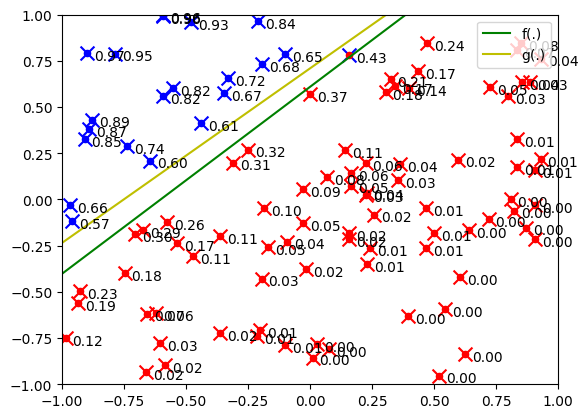

In [39]:
from matplotlib import pyplot as plt

draw(_X, _y, rIN)
rx = [ [1, x[0], x[1]] for x in _X]

#Executar o ajuste dos dados com Regressao Logistica
classifier = LogisticRegression_(0.1, 1000)
classifier.fit(rx, _y)

#Plota as porcentagens da Regressao Logistica 
pred = classifier.predict_prob(rx)
print(pred)

for x, pred_x in zip(_X, pred) :
  plt.annotate("{:.2f}".format(pred_x), xy=(x[0], x[1]), xytext=(5,-5), textcoords='offset points')

#desenha a reta inferida pela regressao logistica
xRL = [-1, +1]
yRL = [classifier.getRegressionY(xRL[0]), classifier.getRegressionY(xRL[1])]
plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')

#plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)
xP = [_X[i][0] for i in range(N) if(pred[i] >= 0.5)]
yP = [_X[i][1] for i in range(N) if(pred[i] >= 0.5)]
xN = [_X[i][0] for i in range(N) if(pred[i] < 0.5)]
yN = [_X[i][1] for i in range(N) if(pred[i] < 0.5)]

plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)

#Computando o erro dentro da amostra (Ein)
pred = classifier.predict(rx)

errorIN = 0
for pn, yn in zip(pred, _y):
  if(pn != yn):
    errorIN += 1

print("Error in : " + str(errorIN/N * 100) + "%")

**Atividade 4:**

1. Reproduza o mesmo experimento para o classificador linear com Regressão Linear (*RCClassifier*);
2. Implemente o algoritmo *Gradiente Descendente Estocástico* na classe *LogisticRegression_* e compare os resultados.

Ein = 1.0%


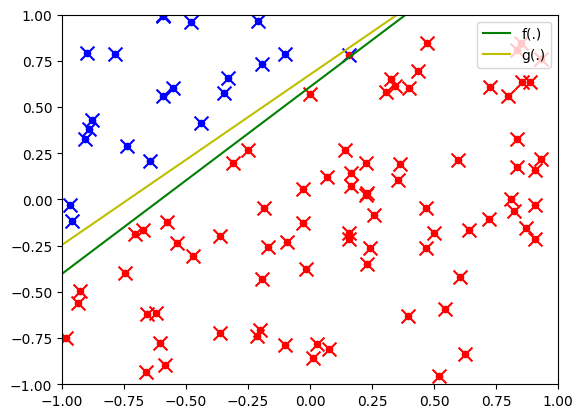

In [40]:
from lrclassifier import LRClassifier

classifier = LRClassifier()
classifier.fit(rx, _y)

draw(_X, _y, rIN)

#desenha a reta inferida pela regressao linear
xRL = [-1, +1]
yRL = [classifier.getRegressionY(xRL[0]), classifier.getRegressionY(xRL[1])]
plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')

#plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)
pred = classifier.predict(rx)
xP = [_X[i][0] for i in range(N) if(pred[i] > 0)]
yP = [_X[i][1] for i in range(N) if(pred[i] > 0)]
xN = [_X[i][0] for i in range(N) if(pred[i] < 0)]
yN = [_X[i][1] for i in range(N) if(pred[i] < 0)]

plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)

#Computando o erro dentro da amostra (Ein)
eIn = 0
for i in range(N):
  if(pred[i] != _y[i]):
    eIn += 1
eIn /= N
print("Ein = " + str(eIn * 100) + "%")

[3.63969543e-02 9.55570110e-01 4.15638034e-02 6.43100665e-02
 7.26941961e-01 3.29465325e-02 2.08075622e-01 1.75963046e-01
 1.19400176e-03 5.10373185e-02 1.36769536e-03 2.70171082e-03
 9.58411112e-01 5.27086949e-03 4.27472188e-03 6.26856333e-03
 3.31705034e-02 3.91003862e-03 7.95052313e-02 4.75954975e-02
 3.62934948e-03 3.76161735e-01 3.02428090e-01 3.42471458e-02
 1.04907061e-01 8.24974722e-02 9.59294685e-01 2.24436435e-02
 6.85843414e-01 3.69125684e-02 4.78600971e-02 8.24721471e-01
 6.41722218e-03 8.83518594e-03 2.29522316e-01 1.95228770e-03
 2.87535802e-02 1.67807509e-01 1.86400318e-02 1.45699149e-01
 4.34502034e-01 3.03687424e-02 2.59912897e-01 6.73934294e-01
 3.96928100e-02 1.29975512e-02 9.69679480e-01 8.72597111e-01
 2.13960233e-02 1.87344181e-02 1.07894758e-01 2.74111931e-03
 7.48781783e-03 1.74572569e-02 3.12102285e-01 6.42760189e-02
 1.25173885e-01 6.17095505e-02 3.63687652e-04 6.11058460e-01
 4.50574281e-02 6.93874899e-02 2.10488614e-02 5.77850363e-01
 7.25976326e-02 1.055396

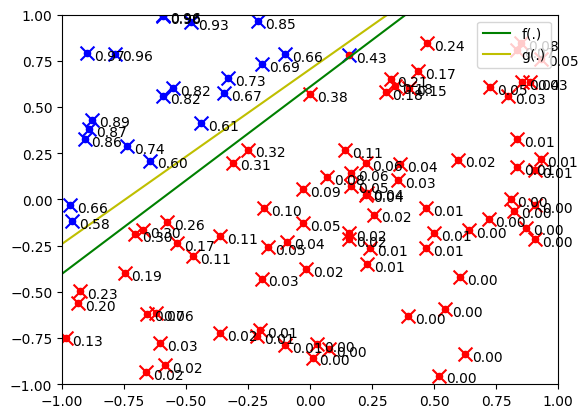

In [41]:
from matplotlib import pyplot as plt

draw(_X, _y, rIN)
rx = [ [1, x[0], x[1]] for x in _X]

#Executar o ajuste dos dados com Regressao Logistica
classifier = LogisticRegression_(0.1, 1000, bs=32)
classifier.fit(rx, _y)

#Plota as porcentagens da Regressao Logistica 
pred = classifier.predict_prob(rx)
print(pred)

for x, pred_x in zip(_X, pred) :
  plt.annotate("{:.2f}".format(pred_x), xy=(x[0], x[1]), xytext=(5,-5), textcoords='offset points')

#desenha a reta inferida pela regressao logistica
xRL = [-1, +1]
yRL = [classifier.getRegressionY(xRL[0]), classifier.getRegressionY(xRL[1])]
plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')

#plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)
xP = [_X[i][0] for i in range(N) if(pred[i] >= 0.5)]
yP = [_X[i][1] for i in range(N) if(pred[i] >= 0.5)]
xN = [_X[i][0] for i in range(N) if(pred[i] < 0.5)]
yN = [_X[i][1] for i in range(N) if(pred[i] < 0.5)]

plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)

#Computando o erro dentro da amostra (Ein)
pred = classifier.predict(rx)

errorIN = 0
for pn, yn in zip(pred, _y):
  if(pn != yn):
    errorIN += 1

print("Error in : " + str(errorIN/N * 100) + "%")

Atividade 5:

1. Reproduza o mesmo experimento com a classe LogisticRegression do pacote *sklearn.linear_model*
        from sklearn.linear_model import LogisticRegression

[[0.94293424 0.05706576]
 [0.11130662 0.88869338]
 [0.93661907 0.06338093]
 [0.91259922 0.08740078]
 [0.38519566 0.61480434]
 [0.94628233 0.05371767]
 [0.78911064 0.21088936]
 [0.81440027 0.18559973]
 [0.99575479 0.00424521]
 [0.92640718 0.07359282]
 [0.9953213  0.0046787 ]
 [0.99213254 0.00786746]
 [0.10651058 0.89348942]
 [0.98680801 0.01319199]
 [0.98881972 0.01118028]
 [0.98507289 0.01492711]
 [0.94737264 0.05262736]
 [0.98953715 0.01046285]
 [0.89861744 0.10138256]
 [0.92992722 0.07007278]
 [0.98999098 0.01000902]
 [0.66304475 0.33695525]
 [0.71443323 0.28556677]
 [0.94601093 0.05398907]
 [0.87316436 0.12683564]
 [0.89445154 0.10554846]
 [0.10488759 0.89511241]
 [0.95970485 0.04029515]
 [0.42238104 0.57761896]
 [0.94294263 0.05705737]
 [0.92946892 0.07053108]
 [0.28737682 0.71262318]
 [0.98468757 0.01531243]
 [0.98038773 0.01961227]
 [0.76864476 0.23135524]
 [0.99385598 0.00614402]
 [0.95184139 0.04815861]
 [0.81859953 0.18140047]
 [0.96535707 0.03464293]
 [0.8391909  0.1608091 ]


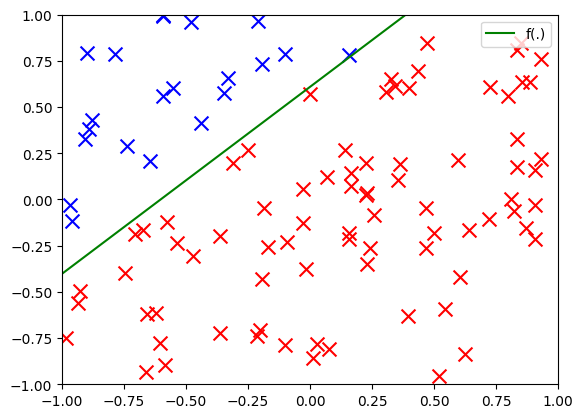

In [42]:
from sklearn.linear_model import LogisticRegression
draw(_X, _y, rIN)

classifier = LogisticRegression(max_iter=1000)
classifier.fit(rx, _y) 

#Plota as porcentagens da Regressao Logistica 
pred = classifier.predict_proba(rx)
print(pred)

#Computando o erro dentro da amostra (Ein)
pred = classifier.predict(rx)
#print(pred)

errorIN = 0
for pn, yn in zip(pred, _y):
  if(pn != yn):
    errorIN += 1

print("Error in : " + str(errorIN/N * 100) + "%")